# INDIVIDUAL PROJECT - MDS
## AIPORTS                                                                 <img style="margin-right: 50px;" width=80 src="https://media.giphy.com/media/KAq5w47R9rmTuvWOWa/giphy.gif">
<img width=80 src="imagen/Assembler.png">

# By: Andrea Justement

# All aboard!!

  <img style="margin-right: 800px;" width=600 src="https://www.lavanguardia.com/files/image_948_465/uploads/2019/03/14/5fa516a6a1882.jpeg">

# EXERCISES

1. Loading of the dataset as a dataframe. You may download the .csv and open it, or, as a more interesting option, you may directly load the dataset directly from the URL.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import sys

class DataLoader:
    def __init__(self, url):
        # Constructor to initialize the DataLoader instance with a given URL
        self.url = url
        self.df = self.load_data()

    def load_data(self):
        # Method to load data from the specified URL into a Pandas DataFrame
        response = requests.get(self.url)

        if response.status_code == 200:
            # If the GET request is successful (status code 200), parse the data into a DataFrame
            data = StringIO(response.text)
            return pd.read_csv(data, header=None, names=['AirportID', 'Name', 'City', 'Country', 'IATA',
                                                         'ICAO', 'Latitude', 'Longitude', 'Altitude', 
                                                         'Timezone', 'DST', 'Tz', 'Type', 'Source'])
        else:
            # If the GET request fails, print an error message and return None
            print(f"Error in GET request. Status code: {response.status_code}")
            return None

# Create an instance of DataLoader
data_loader = DataLoader("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat")

# Check if the load was successful before continuing
if data_loader.df is None:
    # If data loading failed, print an error message and exit the program
    print("Cannot proceed without data.")
    sys.exit(1)


2. Show the first 10 rows of the dataframe.

In [2]:
# Point 2: Display the first 10 rows
print("First 10 rows of the DataFrame:\n", data_loader.df.head(10))


First 10 rows of the DataFrame:
    AirportID                                         Name          City  \
0          1                               Goroka Airport        Goroka   
1          2                               Madang Airport        Madang   
2          3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3          4                               Nadzab Airport        Nadzab   
4          5  Port Moresby Jacksons International Airport  Port Moresby   
5          6                  Wewak International Airport         Wewak   
6          7                           Narsarsuaq Airport  Narssarssuaq   
7          8                      Godthaab / Nuuk Airport      Godthaab   
8          9                        Kangerlussuaq Airport   Sondrestrom   
9         10                               Thule Air Base         Thule   

            Country IATA  ICAO   Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA  -6.081690  145.391998      52

3. Obtain a statistical summary and interpret the output (you can choose to explain using text or complement with graphical tools).

Statistical summary of the DataFrame:
           AirportID      Latitude     Longitude      Altitude
count  12668.000000  12668.000000  12668.000000  12668.000000
mean    7311.584465     29.820510     -1.041145    831.871093
std     4202.520098     26.923942     83.618663   1498.239733
min        1.000000    -90.000000   -179.876999  -1266.000000
25%     3349.750000     16.115875    -77.294770     38.000000
50%     7771.500000     38.341850      6.955411    232.500000
75%    10943.250000     49.306042     47.835824    883.500000
max    14111.000000     90.000000    179.951004  14472.000000


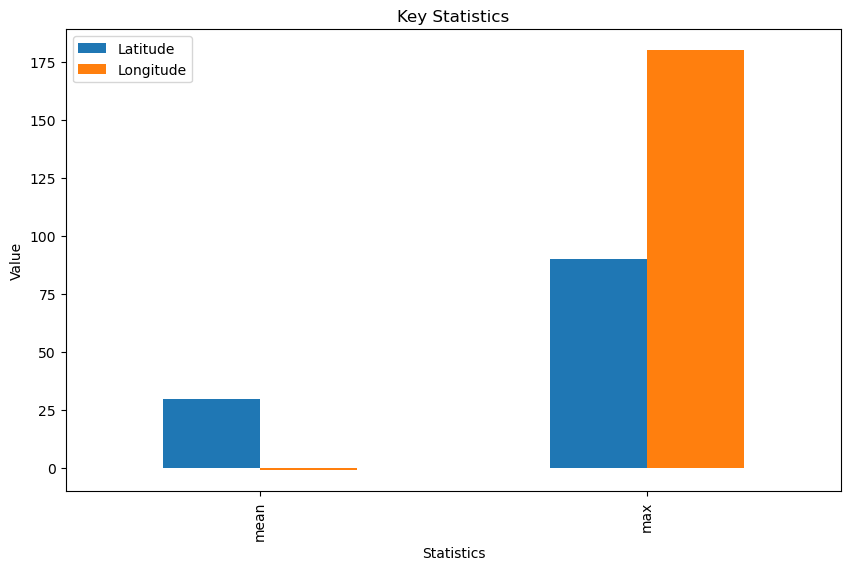

In [3]:
# Point 3: Get statistical summary
statistical_summary = data_loader.df.describe()
print("Statistical summary of the DataFrame:\n", statistical_summary)

# Bar chart for some key statistics
columns_to_plot = ['Latitude', 'Longitude']
statistics_to_plot = ['mean','max']  # Statistics to select
statistical_summary.loc[statistics_to_plot, columns_to_plot].plot(kind='bar', figsize=(10, 6), title='Key Statistics')
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.show()


4. For this analysis we are not going to use the 'AirportID', 'Latitude', 'Longitude' and 'Altitude' columns, remove them from the dataframe.

In [4]:
# Drop specified columns from the DataFrame
data_loader.df = data_loader.df.drop(['AirportID', 'Latitude', 'Longitude', 'Altitude'], axis=1, errors='ignore')
print("Columns successfully removed.")

Columns successfully removed.


In [5]:
# Result after deleting the columns
data_loader.df.head()


,Name,City,Country,IATA,ICAO,Timezone,DST,Tz,Type,Source
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,10,U,Pacific/Port_Moresby,airport,OurAirports


5. Get a statistical summary again, how has the data changed?


In [6]:
# Get a new statistical summary after removing columns
new_statistical_summary = data_loader.df.describe()
print("New statistical summary after removing columns:\n", new_statistical_summary)


New statistical summary after removing columns:
              Name      City        Country   IATA   ICAO Timezone    DST  \
count       12668     12619          12668  12668  12667    12668  12668   
unique      12330      9673            241   6925   8161       42      8   
top     North Sea  New York  United States     \N     \N        1      E   
freq           21        50           2708   5744   4507     2706   3478   

           Tz     Type       Source  
count   12668    12668        12668  
unique    312        5            4  
top        \N  airport  OurAirports  
freq     4282     8264         7698  


6. In the statistical summary mentioned earlier, it appears that in the TZ (time zone) column there is an unusual value, "\N". Determine the proportion of these values using the value_counts method.

In [7]:
# Get the proportion of unusual values in the 'Timezone' column
tz_value_counts = data_loader.df['Timezone'].value_counts(normalize=True)
unusual_proportion = tz_value_counts.get('\\N', 0)

# Print the proportion directly
print(f"Proportion of unusual values in the 'Timezone' column: {unusual_proportion:.2%}")


Proportion of unusual values in the 'Timezone' column: 2.79%


7. Reload the dataset so that null values are correctly interpreted (repeat section 4, delete columns).

In [8]:
# Replace "\N" with NaN in the DataFrame
data_loader.df.replace("\\N", pd.NA, inplace=True)


8. Check the entire dataframe for null values

In [9]:
# Count null values per column
null_values = data_loader.df.isnull().sum()
print("Null values per column:\n", null_values)


Null values per column:
 Name           0
City          49
Country        0
IATA        5744
ICAO        4508
Timezone     353
DST          353
Tz          4282
Type        1651
Source      1651
dtype: int64


9. Overwrite the null values of the IATA and ICAO columns with the string 'UNKNOWN'.

In [10]:
# Overwrite null values in the 'IATA' and 'ICAO' columns
data_loader.df[['IATA', 'ICAO']] = data_loader.df[['IATA', 'ICAO']].fillna('UNKNOWN')
print("Null values successfully overwritten.")


Null values successfully overwritten.


10.Change the type of the DST and TZ variables to categorical.

In [11]:
data_loader.df[['DST', 'Tz']] = data_loader.df[['DST', 'Tz']].astype('category')
   


11. Obtain a statistical summary of the categorical variables.

In [12]:
# Point 11: Get a statistical summary of categorical variables
print("Statistical summary of categorical variables:\n", data_loader.df[['DST', 'Tz']].describe())


Statistical summary of categorical variables:
           DST                Tz
count   12315              8386
unique      7               311
top         E  America/New_York
freq     3478               705


12. Group the data frame by airport type, showing the type count. Consider the best way to communicate the results; a plot might be helpful.

Airport Type Counts:
       Type  Count
0  airport   8264
1     port    101
2  station   1332
3  unknown   1320


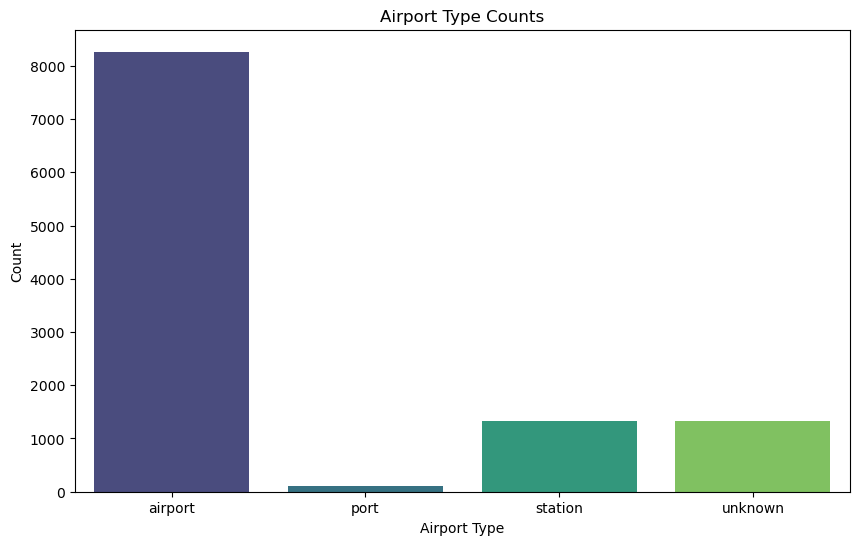

In [13]:
# Group the data frame by airport type and count the occurrences
airport_type_counts = data_loader.df.groupby('Type').size().reset_index(name='Count')

# Display the grouped data
print("Airport Type Counts:\n", airport_type_counts)

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', data=airport_type_counts, palette='viridis')
plt.title('Airport Type Counts')
plt.xlabel('Airport Type')
plt.ylabel('Count')
plt.show()


13. Select the names of cities where the airport type is "port," ensuring no repeated entries. How many cities have at least one port?

In [14]:
# Count the number of cities with at least one port
num_port_cities = len(data_loader.df[data_loader.df['Type'] == 'port']['City'].unique())
print(f"Number of cities with at least one port: {num_port_cities}")


Number of cities with at least one port: 90


14. Show all rows for the fields: name of the airport, name of the country, and name of the city for airports located in Spain.


In [15]:
# Filter airports in Spain and select specific columns
spain_airports = data_loader.df[data_loader.df['Country'] == 'Spain'][['Name', 'Country', 'City']]
print("Airports in Spain:\n", spain_airports)


Airports in Spain:
                                          Name Country                    City
1030                    Fuerteventura Airport   Spain           Fuerteventura
1031                           Hierro Airport   Spain                  Hierro
1032                         La Palma Airport   Spain  Santa Cruz De La Palma
1033                     Gran Canaria Airport   Spain            Gran Canaria
1034                        Lanzarote Airport   Spain                Arrecife
...                                       ...     ...                     ...
11437                     Madrid Estacion Sur   Spain                  Madrid
11438                     Granada Bus Station   Spain                 Granada
11879       Palma de Mallorca Cruise Terminal   Spain       Palma de Mallorca
12234                      Algeciras Heliport   Spain               Algeciras
12386  Región de Murcia International Airport   Spain                  Murcia

[145 rows x 3 columns]


15. Show the names of the countries and airports belonging to the cities of Madrid and Barcelona. Are all the records from Spain?


In [16]:
# Filter airports in Madrid and Barcelona and select specific columns
madrid_barcelona_airports = data_loader.df[data_loader.df['City'].isin(['Madrid', 'Barcelona'])]\
[['City', 'Country', 'Name']]
print("Airports in Madrid and Barcelona:\n", madrid_barcelona_airports)


Airports in Madrid and Barcelona:
             City    Country                                               Name
1188   Barcelona      Spain                    Barcelona International Airport
1194      Madrid      Spain                                    Getafe Air Base
1198      Madrid      Spain               Adolfo Suárez Madrid–Barajas Airport
1214      Madrid      Spain                                   Torrejón Airport
1217      Madrid      Spain                                     Cuatro Vientos
2690   Barcelona  Venezuela  General José Antonio Anzoategui International ...
6302   Barcelona      Spain                          Barcelona Cruise Terminal
8046      Madrid      Spain                                             Atocha
8053      Madrid      Spain                                  Chamartin Station
8055   Barcelona      Spain                                           Aeroport
8056   Barcelona      Spain                                  Passeig de Gracia
8057   Barcelona 

16. Save the previous results in a .csv file named Madrid_Barcelona.csv

In [17]:
# 16. Save the previous results to a .csv file named Madrid_Barcelona.csv
madrid_barcelona_airports.to_csv('Madrid_Barcelona.csv', index=False)


# Curiosities

* Classify the countries of South America by the number of airports.

In [17]:
# Filter the data to include only countries in South America
south_america_data = data_loader.df[data_loader.df['Country'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'])]
# Count the number of airports per country
airports_per_country = south_america_data['Country'].value_counts()
# Display the results
print("Number of airports per country in South America:\n", airports_per_country)


Number of airports per country in South America:
 Country
Brazil       288
Argentina    108
Colombia      81
Venezuela     61
Chile         52
Peru          52
Ecuador       44
Bolivia       27
Suriname      27
Guyana        19
Uruguay       16
Paraguay       9
Name: count, dtype: int64


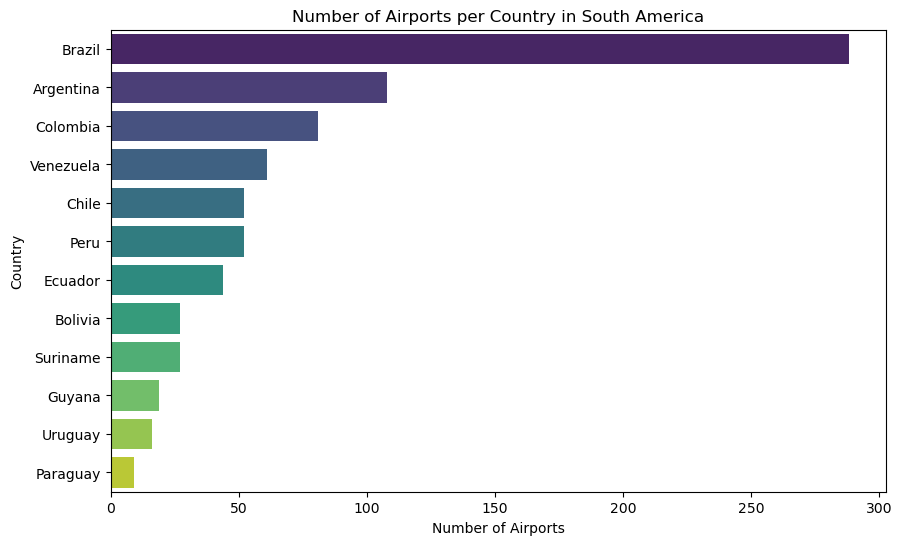

In [20]:
countries = ['Brazil', 'Argentina', 'Colombia', 'Venezuela', 'Chile', 'Peru', 'Ecuador', 'Bolivia', 'Suriname', 'Guyana', 'Uruguay', 'Paraguay']
airports_count = [288, 108, 81, 61, 52, 52, 44, 27, 27, 19, 16, 9]

# Crear un gráfico de barras horizontal con colores divergentes
plt.figure(figsize=(10, 6))
sns.barplot(x=airports_count, y=countries, palette='viridis')
plt.title('Number of Airports per Country in South America')
plt.xlabel('Number of Airports')
plt.ylabel('Country')

# Mostrar el gráfico
plt.show()

* What are the airports in Paraguay?

In [18]:
# Filter the data to include only airports in Paraguay
paraguay_airports = data_loader.df[data_loader.df['Country'] == 'Paraguay']
# Display the names of airports in Paraguay
paraguay_airport_names = paraguay_airports['Name']
print("Names of airports in Paraguay:\n", paraguay_airport_names)


Names of airports in Paraguay:
 2575             Silvio Pettirossi International Airport
2576                              Juan De Ayolas Airport
2577                Teniente Col Carmelo Peralta Airport
2578                                      Itaipú Airport
2579         Dr. Luis Maria Argaña International Airport
2580                       Carlos Miguel Gimenez Airport
4094                       Guarani International Airport
5920     Dr Augusto Roberto Fuster International Airport
11958                                Encarnación Airport
Name: Name, dtype: object
